In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Data Cleaning

In [11]:
excel = pd.ExcelFile('HainanClean_New.xlsx')
hainan = excel.parse("fulldf")
hainan
hainan.columns = hainan.columns.str.replace('  ', '_')
hainan.columns = hainan.columns.str.replace(' ', '_')
hainan.columns = hainan.columns.str.replace('(', '')
hainan.columns = hainan.columns.str.replace('（', '')
hainan.columns = hainan.columns.str.replace(')', '')

d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
     'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
hainan.Month = hainan.Month.map(d)
hainan.BioCNG_Produced_Nm3 = hainan.BioCNG_Produced_m3.shift(-15)
hainan.drop(hainan.tail(15).index,inplace=True)
hainan = hainan[np.isfinite(hainan['Month'])]
hainan.columns
hainan = hainan[np.isfinite(hainan['Lemon_waste_t'])]
hainan = hainan[np.isfinite(hainan['Percolate_t'])]
hainan = hainan.replace(' ',0)
hainan = hainan.replace('',0)
hainan = hainan.replace('  ',0)
hainan = hainan.drop(['Year', 'Month', 'Day', 'Month_#', 'Day_#', 'Raw_Biogas_Produced_m3', 'BioCNG_Sold_m3', 'Vehicle_use_m3',
       'Liquid_Fertilizer_Produced_t', 'Solid_fertilizer_produced_t',
       'Wastewater_flow_to_WWTP_unit?', 'Solid_residues_kg','50%_NaOH/kg', 'FeCl2/kg', 'PAM/kg',
       'Defoamer/kg', 'Project_electricity_use/kWh',
       'Office_space_electricity_use/kWh', 'Water/m3', 'Diesel/L'], axis=1)
hainan.head()

,BioCNG_Produced_m3,Pig_Manure_t,Cassava_t,Fish_waste_water_t,Kitchen_food_waste_t,Municipal_fecal_residue_t,Tea_waste_t,Chicken_litter_t,Bagasse_feed_t,Alcohol_waste_t,Chinese_medicine_waste_t,Energy_grass_t,Banana_fruit_shafts_t,Lemon_waste_t,Percolate_t,Other_waste_t
0,2024.0,6.82,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,26.44
1,2909.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,28.92
2,3020.0,6.66,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,26.90
3,3042.0,12.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,2779.0,9.54,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


# Preliminary Work

In [12]:
hainan_train, hainan_test = train_test_split(hainan, test_size=0.2)
print('train data len:',len(hainan_train))
print('test data len:',len(hainan_test))

train data len: 1098
test data len: 275


In [13]:
for col in hainan.columns[1:]:
    hainan['1/'+col] = 1/(hainan[col])
hainan.head()
hainan.replace(float('inf'), 0, inplace=True)
hainan.columns

Index(['BioCNG_Produced_m3', 'Pig_Manure_t', 'Cassava_t', 'Fish_waste_water_t',
       'Kitchen_food_waste_t', 'Municipal_fecal_residue_t', 'Tea_waste_t',
       'Chicken_litter_t', 'Bagasse_feed_t', 'Alcohol_waste_t',
       'Chinese_medicine_waste_t', 'Energy_grass_t', 'Banana_fruit_shafts_t',
       'Lemon_waste_t', 'Percolate_t', 'Other_waste_t', '1/Pig_Manure_t',
       '1/Cassava_t', '1/Fish_waste_water_t', '1/Kitchen_food_waste_t',
       '1/Municipal_fecal_residue_t', '1/Tea_waste_t', '1/Chicken_litter_t',
       '1/Bagasse_feed_t', '1/Alcohol_waste_t', '1/Chinese_medicine_waste_t',
       '1/Energy_grass_t', '1/Banana_fruit_shafts_t', '1/Lemon_waste_t',
       '1/Percolate_t', '1/Other_waste_t'],
      dtype='object')

In [14]:
for col in hainan.columns[1:]:
    hainan[col+"**2"] = (hainan[col])**2
hainan.head()

,BioCNG_Produced_m3,Pig_Manure_t,Cassava_t,Fish_waste_water_t,Kitchen_food_waste_t,Municipal_fecal_residue_t,Tea_waste_t,Chicken_litter_t,Bagasse_feed_t,Alcohol_waste_t,...,1/Tea_waste_t**2,1/Chicken_litter_t**2,1/Bagasse_feed_t**2,1/Alcohol_waste_t**2,1/Chinese_medicine_waste_t**2,1/Energy_grass_t**2,1/Banana_fruit_shafts_t**2,1/Lemon_waste_t**2,1/Percolate_t**2,1/Other_waste_t**2
0,2024.0,6.82,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,...,0.0,0.0,0.004444,0.0,0.0,0.0,0.0,0.0,0.0,0.001430
1,2909.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,...,0.0,0.0,0.004444,0.0,0.0,0.0,0.0,0.0,0.0,0.001196
2,3020.0,6.66,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,...,0.0,0.0,0.004444,0.0,0.0,0.0,0.0,0.0,0.0,0.001382
3,3042.0,12.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,2779.0,9.54,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.012346,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [15]:
hainan_train, hainan_test = train_test_split(hainan, test_size=0.2)
print('train data len:',len(hainan_train))
print('test data len:',len(hainan_test))
hainan.head()
hainan.columns

train data len: 1098
test data len: 275


Index(['BioCNG_Produced_m3', 'Pig_Manure_t', 'Cassava_t', 'Fish_waste_water_t',
       'Kitchen_food_waste_t', 'Municipal_fecal_residue_t', 'Tea_waste_t',
       'Chicken_litter_t', 'Bagasse_feed_t', 'Alcohol_waste_t',
       'Chinese_medicine_waste_t', 'Energy_grass_t', 'Banana_fruit_shafts_t',
       'Lemon_waste_t', 'Percolate_t', 'Other_waste_t', '1/Pig_Manure_t',
       '1/Cassava_t', '1/Fish_waste_water_t', '1/Kitchen_food_waste_t',
       '1/Municipal_fecal_residue_t', '1/Tea_waste_t', '1/Chicken_litter_t',
       '1/Bagasse_feed_t', '1/Alcohol_waste_t', '1/Chinese_medicine_waste_t',
       '1/Energy_grass_t', '1/Banana_fruit_shafts_t', '1/Lemon_waste_t',
       '1/Percolate_t', '1/Other_waste_t', 'Pig_Manure_t**2', 'Cassava_t**2',
       'Fish_waste_water_t**2', 'Kitchen_food_waste_t**2',
       'Municipal_fecal_residue_t**2', 'Tea_waste_t**2', 'Chicken_litter_t**2',
       'Bagasse_feed_t**2', 'Alcohol_waste_t**2',
       'Chinese_medicine_waste_t**2', 'Energy_grass_t**2',
   

In [16]:
# Predict on the training data
X_train = hainan_train[['Pig_Manure_t', 'Cassava_t', 'Fish_waste_water_t',
       'Kitchen_food_waste_t', 'Municipal_fecal_residue_t', 'Tea_waste_t',
       'Chicken_litter_t', 'Bagasse_feed_t', 'Alcohol_waste_t',
       'Chinese_medicine_waste_t', 'Energy_grass_t', 'Banana_fruit_shafts_t',
       'Lemon_waste_t', 'Percolate_t', 'Other_waste_t', '1/Pig_Manure_t',
       '1/Cassava_t', '1/Fish_waste_water_t', '1/Kitchen_food_waste_t',
       '1/Municipal_fecal_residue_t', '1/Tea_waste_t', '1/Chicken_litter_t',
       '1/Bagasse_feed_t', '1/Alcohol_waste_t', '1/Chinese_medicine_waste_t',
       '1/Energy_grass_t', '1/Banana_fruit_shafts_t', '1/Lemon_waste_t',
       '1/Percolate_t', '1/Other_waste_t', 'Pig_Manure_t**2', 'Cassava_t**2',
       'Fish_waste_water_t**2', 'Kitchen_food_waste_t**2',
       'Municipal_fecal_residue_t**2', 'Tea_waste_t**2', 'Chicken_litter_t**2',
       'Bagasse_feed_t**2', 'Alcohol_waste_t**2',
       'Chinese_medicine_waste_t**2', 'Energy_grass_t**2',
       'Banana_fruit_shafts_t**2', 'Lemon_waste_t**2', 'Percolate_t**2',
       'Other_waste_t**2', '1/Pig_Manure_t**2', '1/Cassava_t**2',
       '1/Fish_waste_water_t**2', '1/Kitchen_food_waste_t**2',
       '1/Municipal_fecal_residue_t**2', '1/Tea_waste_t**2',
       '1/Chicken_litter_t**2', '1/Bagasse_feed_t**2', '1/Alcohol_waste_t**2',
       '1/Chinese_medicine_waste_t**2', '1/Energy_grass_t**2',
       '1/Banana_fruit_shafts_t**2', '1/Lemon_waste_t**2', '1/Percolate_t**2',
       '1/Other_waste_t**2']]
y_train = hainan_train.BioCNG_Produced_m3

# Predict on the test data
X_test = hainan_test[['Pig_Manure_t', 'Cassava_t', 'Fish_waste_water_t',
       'Kitchen_food_waste_t', 'Municipal_fecal_residue_t', 'Tea_waste_t',
       'Chicken_litter_t', 'Bagasse_feed_t', 'Alcohol_waste_t',
       'Chinese_medicine_waste_t', 'Energy_grass_t', 'Banana_fruit_shafts_t',
       'Lemon_waste_t', 'Percolate_t', 'Other_waste_t', '1/Pig_Manure_t',
       '1/Cassava_t', '1/Fish_waste_water_t', '1/Kitchen_food_waste_t',
       '1/Municipal_fecal_residue_t', '1/Tea_waste_t', '1/Chicken_litter_t',
       '1/Bagasse_feed_t', '1/Alcohol_waste_t', '1/Chinese_medicine_waste_t',
       '1/Energy_grass_t', '1/Banana_fruit_shafts_t', '1/Lemon_waste_t',
       '1/Percolate_t', '1/Other_waste_t', 'Pig_Manure_t**2', 'Cassava_t**2',
       'Fish_waste_water_t**2', 'Kitchen_food_waste_t**2',
       'Municipal_fecal_residue_t**2', 'Tea_waste_t**2', 'Chicken_litter_t**2',
       'Bagasse_feed_t**2', 'Alcohol_waste_t**2',
       'Chinese_medicine_waste_t**2', 'Energy_grass_t**2',
       'Banana_fruit_shafts_t**2', 'Lemon_waste_t**2', 'Percolate_t**2',
       'Other_waste_t**2', '1/Pig_Manure_t**2', '1/Cassava_t**2',
       '1/Fish_waste_water_t**2', '1/Kitchen_food_waste_t**2',
       '1/Municipal_fecal_residue_t**2', '1/Tea_waste_t**2',
       '1/Chicken_litter_t**2', '1/Bagasse_feed_t**2', '1/Alcohol_waste_t**2',
       '1/Chinese_medicine_waste_t**2', '1/Energy_grass_t**2',
       '1/Banana_fruit_shafts_t**2', '1/Lemon_waste_t**2', '1/Percolate_t**2',
       '1/Other_waste_t**2']]
y_test = hainan_test.BioCNG_Produced_m3

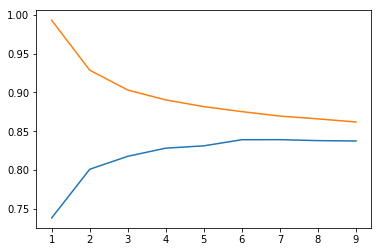

Accuracy of kNN on train set: 0.87
Accuracy of kNN on test set: 0.84


array([  2411.        ,   7110.71428571,   5953.28571429,   2585.28571429,
         9609.28571429,   3664.85714286,   3460.14285714,  11916.42857143,
          877.71428571,   3402.57142857,   2934.42857143,   3467.42857143,
         1997.        ,   5454.14285714,   3265.71428571,   1257.        ,
         1942.        ,   4629.        ,   7511.14285714,   3265.71428571,
        10251.71428571,   1245.85714286,   2033.57142857,   2458.71428571,
        10515.52714286,   3590.        ,   9614.        ,   3597.85714286,
         2331.57142857,  11448.28571429,    755.57142857,   2163.        ,
         2162.        ,   1768.28571429,   1933.57142857,   3168.42857143,
         2279.        ,   5491.28571429,   5737.42857143,    755.57142857,
        11829.28571429,   1245.85714286,   3868.14285714,   3618.57142857,
         2026.42857143,   3350.85714286,   5684.42857143,   9444.        ,
         2154.28571429,   2559.71428571,    755.57142857,   3407.42857143,
         7699.        ,  

In [24]:
#knn
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
scoretest = []
scoretrain = []
for n in range(1,10):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    scoretest.append(knn.score(X_test, y_test))
    scoretrain.append(knn.score(X_train, y_train))
plt.plot(range(1,10), scoretest)
plt.plot(range(1,10), scoretrain)
plt.show()
scoretest
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
print('Accuracy of kNN on train set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of kNN on test set: {:.2f}'.format(knn.score(X_test, y_test)))
y_pred_test